Linear regression on Test Set: loss score = 83617.64734350148, accuracy score = -0.0036372299724556356


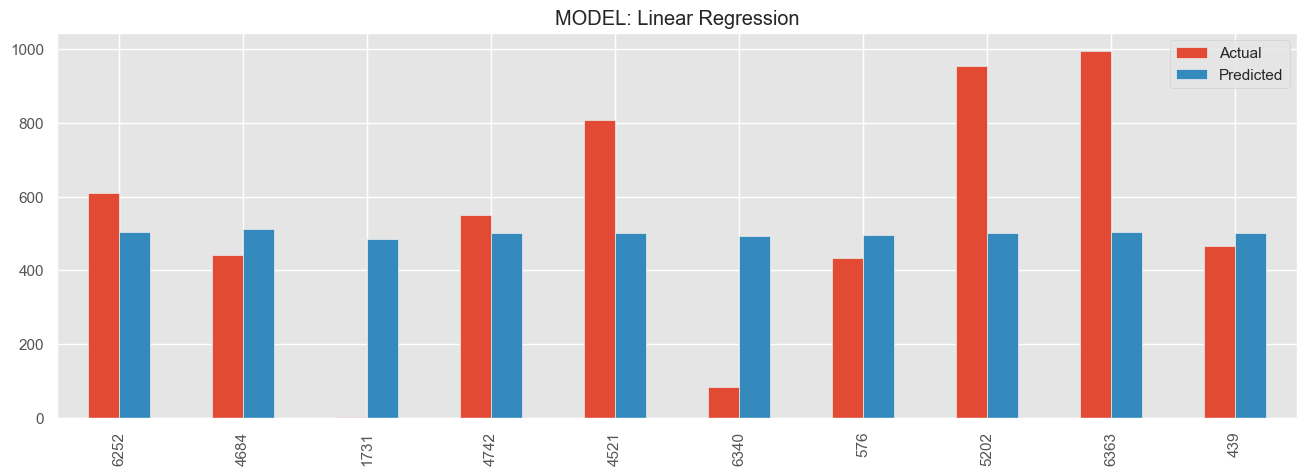

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data for taxi pickups
np.random.seed(0)
n_rows = 10000
pickup_lats = np.random.uniform(40.5774, 40.9176, n_rows)
pickup_lons = np.random.uniform(-74.15, -73.7004, n_rows)
dropoff_lats = np.random.uniform(40.5774, 40.9176, n_rows)
dropoff_lons = np.random.uniform(-74.15, -73.7004, n_rows)
trip_durations = np.random.uniform(0, 12, n_rows)
speeds = np.random.uniform(0, 45.31, n_rows)
trip_distances = np.random.uniform(0, 23, n_rows)
fares = np.random.uniform(0, 1000, n_rows)

# Create a dataframe with the generated data
taxi_data = pd.DataFrame({
    'pickup_lat': pickup_lats,
    'pickup_lon': pickup_lons,
    'dropoff_lat': dropoff_lats,
    'dropoff_lon': dropoff_lons,
    'trip_duration': trip_durations,
    'speed': speeds,
    'trip_distance': trip_distances,
    'fare': fares
})

# Add a 'start_date' column with random dates
start_dates = pd.date_range('2015-01-01', '2016-01-01', periods=n_rows)
taxi_data['start_date'] = start_dates

# Add a 'start_time' column with random times
start_times = pd.date_range('2015-01-01 00:00:00', '2015-01-01 23:59:59', periods=n_rows)
taxi_data['start_time'] = start_times

# Add a 'cluster' column with random cluster assignments
clusters = np.random.randint(0, 40, n_rows)
taxi_data['cluster'] = clusters

# Add a 'time_bin' column with random time bins
time_bins = np.random.randint(0, 144, n_rows)
taxi_data['time_bin'] = time_bins

# Preprocess Data
taxi_data_preprocessed = taxi_data.copy()

# Extract columns to be used as input and output variables
X = taxi_data_preprocessed[['pickup_lat', 'pickup_lon', 'dropoff_lat', 'dropoff_lon', 'trip_duration', 'speed', 'trip_distance', 'cluster', 'time_bin']]
y = taxi_data_preprocessed['fare']

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Train and Test Set Inputs to Range 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with the Best Model: Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

# Evaluate with Test Set using the Trained Model
y_pred = linear_regression.predict(X_test_scaled)

# Calculate Mean Squared Error and R2 Accuracy Score
loss_score = mean_squared_error(y_test, y_pred)
accuracy_score = r2_score(y_test, y_pred)
print(f"Linear regression on Test Set: loss score = {loss_score}, accuracy score = {accuracy_score}")

# Visualize the First 10 Ride Values of the Evaluation for Comparison
plt.style.use('ggplot')
reg_real_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
reg_real_vs_pred = reg_real_vs_pred.head(10)
reg_real_vs_pred.plot(kind='bar', title='MODEL: Linear Regression', figsize=(16,5))
plt.show()

# Regression Plot: Plot y_test vs y_pred
sns.regplot(x="y_test", y="y_pred", data=taxi_data, scatter_kws={"color":"cornflowerblue"}, line_kws={"color":"red"})
plt.title('Linear Regression')
plt.show()